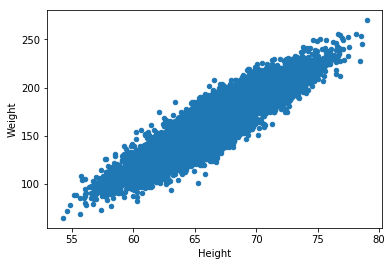

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
df = pd.read_csv('../shared-resources/heights_weights_genders.csv')
df.plot.scatter(x='Height', y='Weight')

In [2]:
mask = df.Gender == 'Female'

In [3]:
df.Gender = mask.astype(int)

In [4]:
from sklearn.linear_model import LogisticRegression
proportion_female = df.Gender.sum() / df.shape[0]
proportion_female

0.5

In [5]:
logistic = LogisticRegression(class_weight={0: 1 - proportion_female, 1: proportion_female})
logistic = logistic.fit(df.Height.values.reshape(-1, 1), df.Gender)

In [6]:
df['logreg1_predicted_gender']=logistic.predict(df.Height.values.reshape(-1,1))

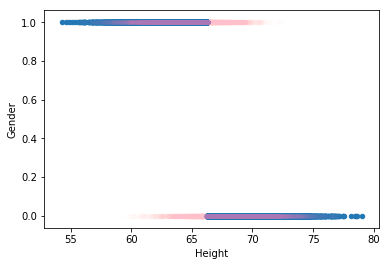

In [7]:
ax = df.plot.scatter(x='Height', y='logreg1_predicted_gender')
df.plot.scatter(ax=ax, x='Height', y='Gender', alpha=0.01, c='pink')

In [8]:
logistic2 = LogisticRegression(class_weight={0: 1 - proportion_female, 1: proportion_female})
X = df[['Height', 'Weight']].values
logistic2 = logistic2.fit(X, df.Gender)
df['logreg2_predicted_gender']=logistic2.predict(X)

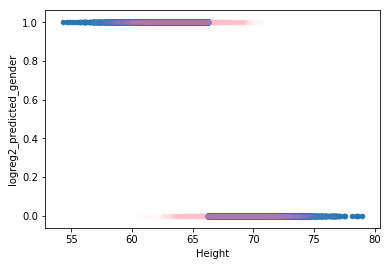

In [9]:
ax = df.plot.scatter(x='Height', y='logreg1_predicted_gender')
df.plot.scatter(ax=ax, x='Height', y='logreg2_predicted_gender',alpha=0.01,c='pink')

In [10]:
((df.logreg1_predicted_gender - df.Gender) ** 2).mean() ** .5

0.4103656905736638

In [11]:
((df.logreg2_predicted_gender - df.Gender) ** 2).mean() ** .5

0.28372521918222215

In [12]:
logistic.score(df.Height.values.reshape(-1,1), df.Gender)

0.83160000000000001

In [13]:
logistic2.score(X, df.Gender)

0.91949999999999998

In [14]:
df['ypred'] = logistic2.predict(X)
correct_pred = df.ypred == df.Gender
correct_pred.sum() / df.shape[0]

0.91949999999999998

In [15]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression(normalize=True)
linearreg = linearreg.fit(X, df.Gender)

In [16]:
linearreg.score(X, df.Gender)

0.64919062023668461

In [17]:
df['ypred_linear'] = linearreg.predict(X)
rmse = pd.np.sqrt(((df.ypred_linear - df.Gender) ** 2).mean())
rmse

0.29614581702402737

In [18]:
# create multivariate regression to predict weight
# use height and gener
linearreg2 = LinearRegression(normalize=True)
X_hg = df[['Height', 'Gender']]
linearreg = linearreg.fit(X_hg, df.Weight)
df['pred_weight_linreg2_hg'] = linearreg.predict(X_hg)

In [19]:
linearreg.score(X_hg, df.Weight)

0.90274817292200915

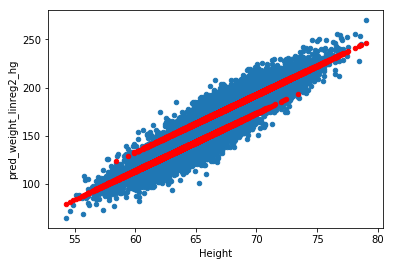

In [20]:
ax = df.plot.scatter(x='Height', y='Weight')
df.plot.scatter(ax=ax, x='Height', y = 'pred_weight_linreg2_hg', c='r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1125bd278>]], dtype=object)

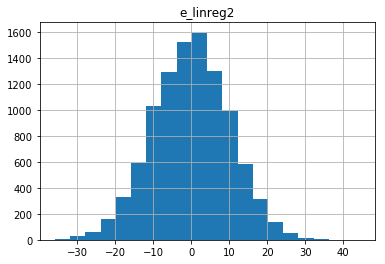

In [21]:
df['e_linreg2'] = df['pred_weight_linreg2_hg'] - df['Weight']
df[['e_linreg2']].hist(bins=20)

In [22]:
((df.e_linreg2 ** 2).mean())** .5

10.012588345446906

In [25]:
import numpy as np

# add a feature of your choice and see how it affects the prediction
# 0: height, 1: weight, 2: height*weight, 3: height + weight, 4: height^2, 5: weight^2
X_hw = np.concatenate((X, (X[:,0] * X[:,1]).reshape(-1,1), (X[:,0] + X[:,1]).reshape(-1,1), (X[:,0]**2).reshape(-1,1), (X[:,1]**2).reshape(-1,1)), axis = 1)

logistic_all = LogisticRegression(class_weight={0: 1 - proportion_female, 1: proportion_female})
logistic_all = logistic_all.fit(X_hw, df.Gender)
logistic_all.score(X_hw, df.Gender)

0.91820000000000002

In [26]:
logistic_add = LogisticRegression(class_weight={0: 1 - proportion_female, 1: proportion_female})
logistic_add = logistic_add.fit(X_hw[:, [0, 1, 3]], df.Gender)
logistic_add.score(X_hw[:, [0, 1, 3]], df.Gender)

0.91949999999999998

In [27]:
logistic_mult = LogisticRegression(class_weight={0: 1 - proportion_female, 1: proportion_female})
logistic_mult = logistic_mult.fit(X_hw[:, [0, 1, 2]], df.Gender)
logistic_mult.score(X_hw[:, [0, 1, 2]], df.Gender)

0.91890000000000005

In [28]:
logistic_h2 = LogisticRegression(class_weight={0: 1 - proportion_female, 1: proportion_female})
logistic_h2 = logistic_h2.fit(X_hw[:, [0, 1, 4]], df.Gender)
logistic_h2.score(X_hw[:, [0, 1, 4]], df.Gender)

0.91959999999999997

In [29]:
logistic_w2 = LogisticRegression(class_weight={0: 1 - proportion_female, 1: proportion_female})
logistic_w2 = logistic_w2.fit(X_hw[:, [0, 1, 5]], df.Gender)
logistic_w2.score(X_hw[:, [0, 1, 5]], df.Gender)

0.91020000000000001

In [30]:
logistic2.score(X, df.Gender)

0.91949999999999998

In [35]:
df['log_height'] = pd.np.log(df.Height)
df.head()

,Gender,Height,Weight,logreg1_predicted_gender,logreg2_predicted_gender,ypred,ypred_linear,pred_weight_linreg2_hg,e_linreg2,log_height
0,0,73.847017,241.893563,0,0,0,-0.557098,215.833489,-26.060075,4.301996
1,0,68.781904,162.310473,0,1,1,0.584266,185.559606,23.249134,4.230941
2,0,74.110105,212.740856,0,0,0,-0.052111,217.405952,4.665097,4.305552
3,0,71.730978,220.042470,0,0,0,-0.273460,203.186050,-16.856420,4.272923
4,0,69.881796,206.349801,0,0,0,-0.117180,192.133595,-14.216206,4.246805


In [38]:
X = df[['Gender', 'Height', 'log_height']]

In [43]:
mvlr = LinearRegression(normalize=True)
mvlr = mvlr.fit(X, df.Weight)
df['predicted_weight_with_log'] = mvlr.predict(X)
mvlr.score(X, df.Weight)

0.90274954246204453